<a href="https://colab.research.google.com/github/bchaithanyasai/greatcode/blob/master/Zillow_Visualization_for_course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from google.colab import files

uploaded = files.upload()

Saving Metro_Zhvi_AllHomes.csv to Metro_Zhvi_AllHomes.csv


In [182]:
import pandas as pd

df=pd.read_csv("Metro_Zhvi_AllHomes.csv")
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,1998-08-31,1998-09-30,1998-10-31,1998-11-30,...,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31
0,102001,0,United States,Country,NaN,106657.0,106684.0,106734.0,106859.0,107001.0,107170.0,107336.0,107546.0,107761.0,108017.0,108266.0,108537.0,108721.0,108953.0,109204.0,109529.0,109857.0,110166.0,110499.0,110794.0,111107.0,111385.0,111736.0,112122.0,112695.0,113224.0,113732.0,114075.0,114447.0,114828.0,115238.0,115701.0,116223.0,116782.0,117263.0,...,210022.0,211071.0,212094.0,213194.0,214355.0,215510.0,216671.0,217778.0,218911.0,220091.0,221334.0,222612.0,223871.0,225073.0,226306.0,227536.0,228775.0,229958.0,231083.0,232175.0,233218.0,234202.0,235124.0,236023.0,236908.0,237771.0,238524.0,239158.0,239747.0,240370.0,241073.0,241819.0,242588.0,243385.0,244203.0,245016.0,245862.0,246767.0,247761.0,248857.0
1,394913,1,"New York, NY",Msa,NY,188793.0,188352.0,188071.0,187536.0,187216.0,186925.0,186746.0,186654.0,186699.0,186823.0,186948.0,187094.0,187370.0,187983.0,188702.0,189376.0,189875.0,190500.0,191125.0,191750.0,192267.0,192778.0,193502.0,194329.0,195232.0,195836.0,196307.0,196728.0,197265.0,197847.0,198421.0,199223.0,200225.0,201452.0,202544.0,...,433770.0,435705.0,437341.0,439127.0,440382.0,442630.0,444909.0,447718.0,450211.0,452539.0,454572.0,456340.0,458042.0,460085.0,462501.0,464979.0,467422.0,469294.0,470963.0,472009.0,473223.0,474787.0,476695.0,478550.0,479810.0,480381.0,480621.0,480844.0,481193.0,481502.0,481860.0,482357.0,482795.0,482986.0,482982.0,483083.0,483578.0,484310.0,485120.0,485812.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,185661.0,185920.0,185940.0,186049.0,186022.0,186049.0,186150.0,186102.0,185987.0,185890.0,185869.0,185993.0,185663.0,185094.0,184762.0,184965.0,185490.0,185969.0,186592.0,187492.0,188507.0,189482.0,190391.0,191416.0,193115.0,195222.0,197189.0,198650.0,200013.0,201309.0,202326.0,203676.0,205361.0,207245.0,209067.0,...,600075.0,603675.0,606324.0,609943.0,612128.0,615791.0,619535.0,622939.0,625854.0,628759.0,631900.0,637061.0,642304.0,646795.0,651214.0,655615.0,659763.0,661773.0,663684.0,665372.0,666531.0,666571.0,667418.0,668411.0,668538.0,668077.0,666095.0,664473.0,663366.0,663753.0,664466.0,665762.0,667739.0,670820.0,673547.0,675828.0,679358.0,683899.0,690429.0,697203.0
3,394463,3,"Chicago, IL",Msa,IL,161371.0,161075.0,160684.0,160239.0,159644.0,159322.0,158852.0,159412.0,160218.0,161854.0,163144.0,164098.0,164379.0,164329.0,164488.0,164349.0,164518.0,164259.0,163960.0,161593.0,158686.0,154448.0,151174.0,148814.0,147955.0,147851.0,147792.0,147775.0,147716.0,147643.0,147968.0,149371.0,151405.0,154064.0,156329.0,...,218822.0,220104.0,221160.0,222480.0,223621.0,224632.0,225280.0,225766.0,226495.0,227398.0,228585.0,229685.0,230908.0,232077.0,232910.0,233325.0,233731.0,234329.0,235236.0,235938.0,236628.0,237360.0,237980.0,238574.0,238868.0,238952.0,239194.0,239447.0,239833.0,240118.0,240345.0,240700.0,240918.0,241025.0,241055.0,241078.0,241212.0,241466.0,241759.0,242168.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,111730.0,111794.0,111953.0,112273.0,112617.0,112865.0,113042.0,113262.0,113484.0,113820.0,114148.0,114478.0,114537.0,114629.0,114656.0,114823.0,114917.0,115111.0,115340.0,115592.0,115887.0,116225.0,116508.

In [183]:
df=df[df['RegionType']!="Country"]
df['RegionName']=[i.split(',')[0] for i in df['RegionName']]
df.drop(['RegionID','RegionType','SizeRank','StateName'],axis=1,inplace=True)
df.head()

,RegionName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,1998-08-31,1998-09-30,1998-10-31,1998-11-30,1998-12-31,1999-01-31,1999-02-28,1999-03-31,...,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31
1,New York,188793.0,188352.0,188071.0,187536.0,187216.0,186925.0,186746.0,186654.0,186699.0,186823.0,186948.0,187094.0,187370.0,187983.0,188702.0,189376.0,189875.0,190500.0,191125.0,191750.0,192267.0,192778.0,193502.0,194329.0,195232.0,195836.0,196307.0,196728.0,197265.0,197847.0,198421.0,199223.0,200225.0,201452.0,202544.0,203696.0,204652.0,205832.0,207087.0,...,433770.0,435705.0,437341.0,439127.0,440382.0,442630.0,444909.0,447718.0,450211.0,452539.0,454572.0,456340.0,458042.0,460085.0,462501.0,464979.0,467422.0,469294.0,470963.0,472009.0,473223.0,474787.0,476695.0,478550.0,479810.0,480381.0,480621.0,480844.0,481193.0,481502.0,481860.0,482357.0,482795.0,482986.0,482982.0,483083.0,483578.0,484310.0,485120.0,485812.0
2,Los Angeles-Long Beach-Anaheim,185661.0,185920.0,185940.0,186049.0,186022.0,186049.0,186150.0,186102.0,185987.0,185890.0,185869.0,185993.0,185663.0,185094.0,184762.0,184965.0,185490.0,185969.0,186592.0,187492.0,188507.0,189482.0,190391.0,191416.0,193115.0,195222.0,197189.0,198650.0,200013.0,201309.0,202326.0,203676.0,205361.0,207245.0,209067.0,210520.0,212261.0,213800.0,215461.0,...,600075.0,603675.0,606324.0,609943.0,612128.0,615791.0,619535.0,622939.0,625854.0,628759.0,631900.0,637061.0,642304.0,646795.0,651214.0,655615.0,659763.0,661773.0,663684.0,665372.0,666531.0,666571.0,667418.0,668411.0,668538.0,668077.0,666095.0,664473.0,663366.0,663753.0,664466.0,665762.0,667739.0,670820.0,673547.0,675828.0,679358.0,683899.0,690429.0,697203.0
3,Chicago,161371.0,161075.0,160684.0,160239.0,159644.0,159322.0,158852.0,159412.0,160218.0,161854.0,163144.0,164098.0,164379.0,164329.0,164488.0,164349.0,164518.0,164259.0,163960.0,161593.0,158686.0,154448.0,151174.0,148814.0,147955.0,147851.0,147792.0,147775.0,147716.0,147643.0,147968.0,149371.0,151405.0,154064.0,156329.0,158054.0,158851.0,159317.0,159796.0,...,218822.0,220104.0,221160.0,222480.0,223621.0,224632.0,225280.0,225766.0,226495.0,227398.0,228585.0,229685.0,230908.0,232077.0,232910.0,233325.0,233731.0,234329.0,235236.0,235938.0,236628.0,237360.0,237980.0,238574.0,238868.0,238952.0,239194.0,239447.0,239833.0,240118.0,240345.0,240700.0,240918.0,241025.0,241055.0,241078.0,241212.0,241466.0,241759.0,242168.0
4,Dallas-Fort Worth,111730.0,111794.0,111953.0,112273.0,112617.0,112865.0,113042.0,113262.0,113484.0,113820.0,114148.0,114478.0,114537.0,114629.0,114656.0,114823.0,114917.0,115111.0,115340.0,115592.0,115887.0,116225.0,116508.0,116863.0,117315.0,117763.0,118125.0,118234.0,118457.0,118705.0,119092.0,119441.0,119803.0,119726.0,119726.0,119638.0,120226.0,120998.0,121985.0,...,212593.0,214229.0,215935.0,217406.0,219117.0,220729.0,222398.0,223839.0,225283.0,226970.0,228835.0,230596.0,232083.0,233461.0,235086.0,236859.0,238496.0,239855.0,241243.0,242471.0,243661.0,244408.0,245421.0,246452.0,247867.0,249106.0,249883.0,250227.0,250402.0,250875.0,251372.0,251982.0,252629.0,253431.0,253908.0,254320.0,254507.0,254891.0,255442.0,256264.0
5,Philadelphia,120533.0,120378.0,120238.0,119995.0,119831.0,119736.0,119692.0,119669.0,119711.0,119797.0,119926.0,120032.0,120162.0,120330.0,120558.0,120809.0,121058.0,121292.0,1214

In [113]:
df[df['RegionName'].str.contains("Ann Arbor")]

,RegionName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,1998-08-31,1998-09-30,1998-10-31,1998-11-30,1998-12-31,1999-01-31,1999-02-28,1999-03-31,...,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31
148,Ann Arbor,138837.0,139228.0,139664.0,140599.0,141686.0,142900.0,144079.0,145204.0,146188.0,147026.0,147876.0,148738.0,149849.0,150948.0,152045.0,152867.0,153491.0,153868.0,154325.0,155002.0,155929.0,157094.0,158075.0,159052.0,159661.0,160399.0,161090.0,162076.0,163032.0,164032.0,164916.0,165452.0,166055.0,166724.0,167725.0,168534.0,169195.0,169945.0,171003.0,...,248842.0,251018.0,252328.0,252877.0,254299.0,256506.0,257837.0,259542.0,260624.0,263379.0,265586.0,268326.0,268890.0,268834.0,269602.0,271437.0,274346.0,275232.0,276869.0,278107.0,280410.0,283442.0,286361.0,287849.0,288295.0,289337.0,290450.0,291630.0,291429.0,292501.0,293181.0,293912.0,293988.0,292635.0,291456.0,290886.0,291733.0,292407.0,292590.0,292192.0


In [184]:
df.replace({"California-Lexington Park":"California"},inplace=True)
df=df[df['RegionName'].isin(['New York','Chicago','California','Detroit','Atlanta','Boston','Houston','Ann Arbor'])]
df.set_index("RegionName",inplace=True)
df=df.T
df.index=pd.to_datetime(df.index)
df.head()

RegionName,New York,Chicago,Houston,Atlanta,Boston,Detroit,Ann Arbor,California
1996-01-31,188793.0,161371.0,108803.0,120616.0,166604.0,103090.0,138837.0,153668.0
1996-02-29,188352.0,161075.0,108877.0,120846.0,166599.0,103462.0,139228.0,153228.0
1996-03-31,188071.0,160684.0,108886.0,121067.0,166770.0,103820.0,139664.0,153010.0
1996-04-30,187536.0,160239.0,109033.0,121558.0,167045.0,104590.0,140599.0,152849.0
1996-05-31,187216.0,159644.0,109171.0,122041.0,167410.0,105378.0,141686.0,152832.0


In [115]:
df.isnull().sum()

RegionName
New York      0
Chicago       0
Houston       0
Atlanta       0
Boston        0
Detroit       0
Ann Arbor     0
California    0
dtype: int64

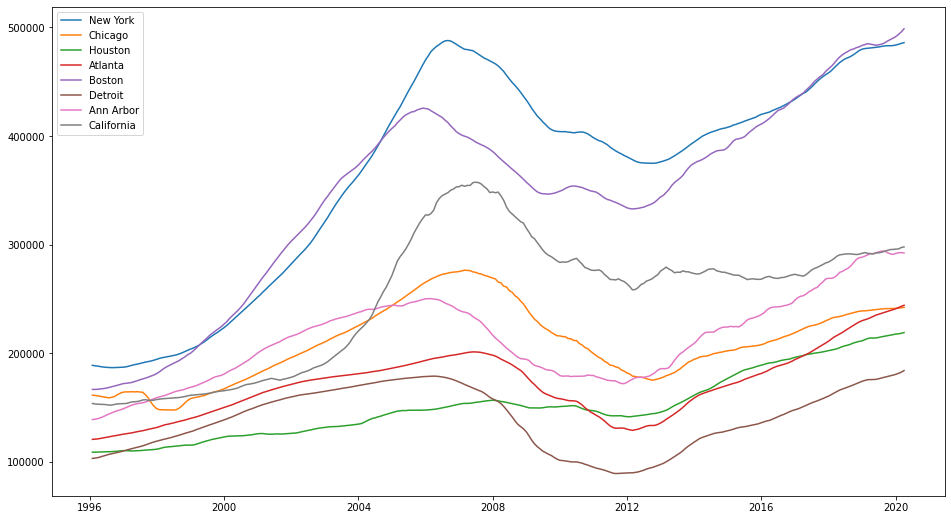

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,9))
ax=sns.lineplot(data=df,dashes=False)

Text(0, 0.5, 'Housing prices in $')

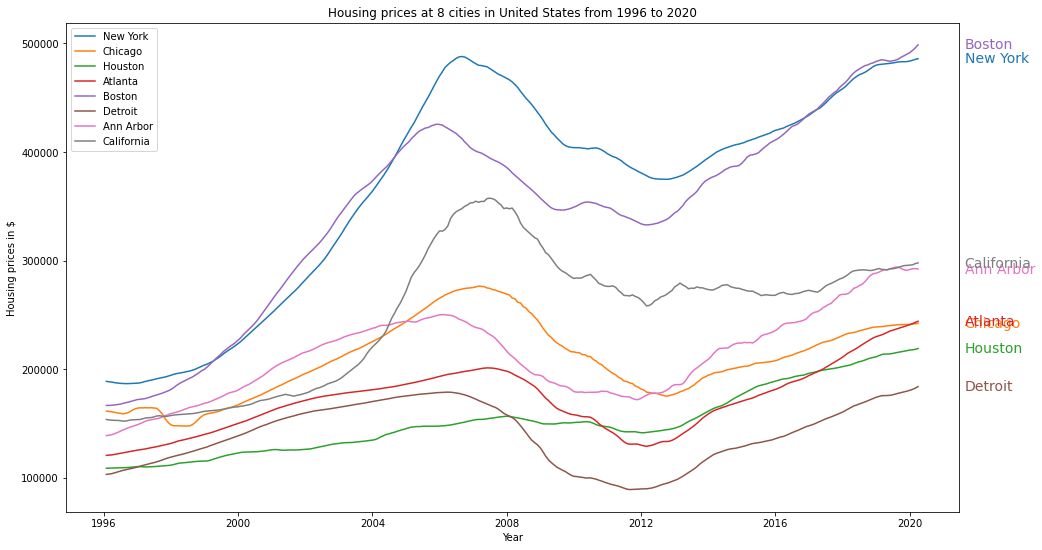

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,9))
ax=sns.lineplot(data=df,dashes=False)

for line, name in zip(ax.lines, df.columns):
    y = line.get_ydata()[-1]
    ax.annotate(name, xy=(1,y), xytext=(6,0), color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                size=14, va="center")
plt.title("Housing prices at 8 cities in United States from 1996 to 2020")
plt.xlabel("Year")
plt.ylabel("Housing prices in $")

In [106]:
from google.colab import files

uploaded = files.upload()

Saving HPI_master.csv to HPI_master.csv


In [161]:
df=pd.read_csv("HPI_master.csv")
df.head()

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,index_sa
0,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,1,100.00,100.00
1,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,2,101.02,101.09
2,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,3,101.36,100.98
3,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,4,101.76,101.05
4,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,5,102.40,101.45


In [166]:
df=df[df['level']=="MSA"]
df.place_name.replace({'California-Lexington Park, MD':'California','New York-Jersey City-White Plains, NY-NJ (MSAD)':'New York','Boston, MA (MSAD)':'Boston','Chicago-Naperville-Evanston, IL (MSAD)':'Chicago','Detroit-Dearborn-Livonia, MI (MSAD)':'Detroit','Atlanta-Sandy Springs-Alpharetta, GA':'Atlanta','Houston-The Woodlands-Sugar Land, TX':'Houston','Ann Arbor, MI':'Ann Arbor'},inplace=True)
df=df[df['place_name'].isin(['New York','Chicago','California','Detroit','Atlanta','Boston','Houston','Ann Arbor'])]
df.place_name.unique()

array(['Ann Arbor', 'Atlanta', 'Boston', 'California', 'Chicago',
       'Detroit', 'Houston', 'New York'], dtype=object)

In [180]:
df=df[df.yr>1997]

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,index_sa
5517,traditional,all-transactions,quarterly,MSA,Ann Arbor,11460,1998,1,121.09,NaN
5518,traditional,all-transactions,quarterly,MSA,Ann Arbor,11460,1998,2,122.90,NaN
5519,traditional,all-transactions,quarterly,MSA,Ann Arbor,11460,1998,3,126.00,NaN
5520,traditional,all-transactions,quarterly,MSA,Ann Arbor,11460,1998,4,126.72,NaN
5521,traditional,all-transactions,quarterly,MSA,Ann Arbor,11460,1999,1,129.20,NaN
...,...,...,...,...,...,...,...,...,...,...
110088,distress-free,purchase-only,quarterly,MSA,Chicago,16984,2018,4,222.16,224.54
110089,distress-free,purchase-only,quarterly,MSA,Chicago,16984,2019,1,225.55,227.38
110090,distress-free,purchase-only,quarterly,MSA,Chicago,16984,2019,2,232.08,227.74
110091,distress-free,purchase-only,quarterly,MSA,Chicago,16984,2019,3,230.19,227.85


In [163]:
df['level'].unique()

array(['USA or Census Division', 'MSA', 'State', 'Puerto Rico'],
      dtype=object)